# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer
from model_evaluator import DataSource, DataPredSelection

# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 200 epochs - without early_stopping in FVC GT dataset NOT aligned',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'reqs': list(cts.ICAO_REQ),
        'aligned': False,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 0.3
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 1,
        'early_stopping': 1,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    }
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 50505
Process ID: 52059
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 200 '
                               'epochs - without early_stopping in FVC GT '
                               'dataset NOT aligned',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16', 'ground truths', 'adamax', 'mtl']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7fa3b09cee50>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                      'early_stopping': 1,
                      'learning_rate': 0.001,
                      'n_epochs': 1,
                      'optimizer': <Optimizer.ADAMAX: 'Adamax'

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

# Create Model

In [9]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


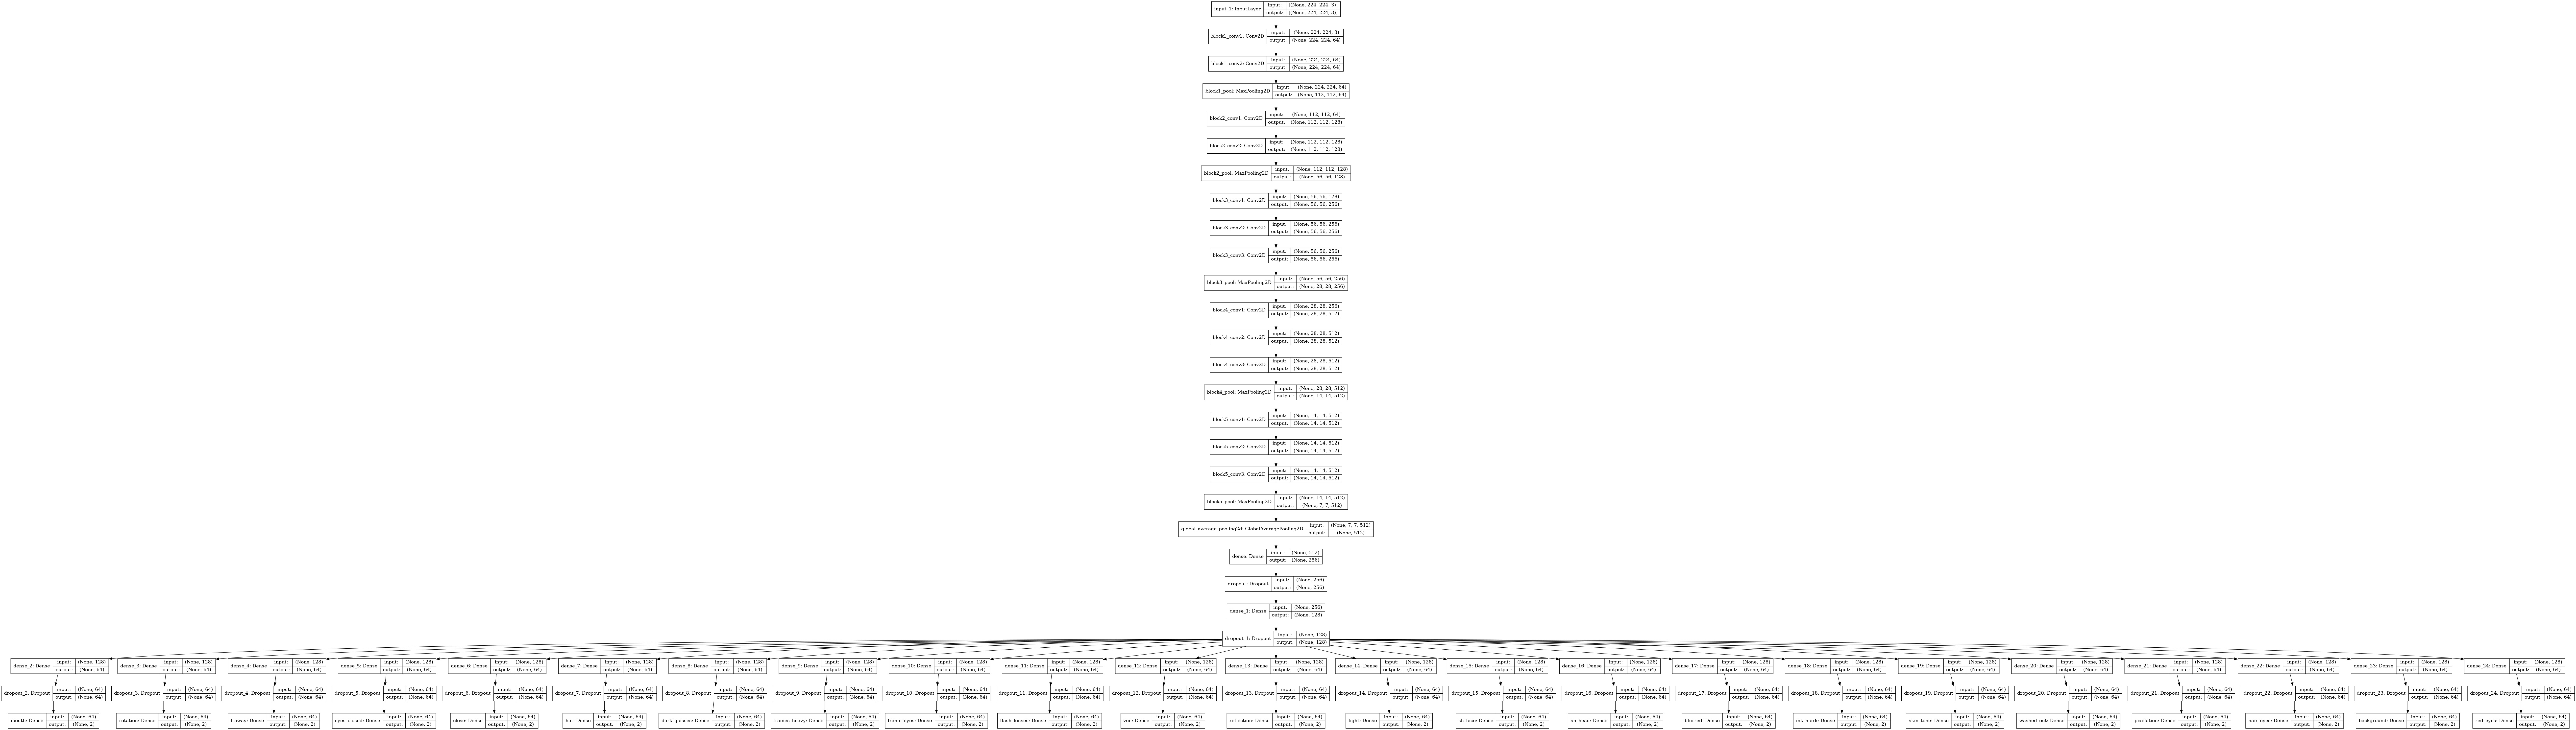

In [10]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model.png")

In [11]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Training Model

In [12]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
77/77 [==============================] - 404s 5s/step - loss: 1.3728 - mouth_loss: 0.6628 - rotation_loss: 0.6411 - l_away_loss: 0.6605 - eyes_closed_loss: 0.6223 - close_loss: 0.4708 - hat_loss: 0.5959 - dark_glasses_loss: 0.5678 - frames_heavy_loss: 0.4524 - frame_eyes_loss: 0.6553 - flash_lenses_loss: 0.6368 - veil_loss: 0.5442 - reflection_loss: 0.6931 - light_loss: 0.5379 - sh_face_loss: 0.6873 - sh_head_loss: 0.6811 - blurred_loss: 0.5762 - ink_mark_loss: 0.4445 - skin_tone_loss: 0.6916 - washed_out_loss: 0.4551 - pixelation_loss: 0.5308 - hair_eyes_loss: 0.6015 - background_loss: 0.6930 - red_eyes_loss: 0.6253 - mouth_accuracy: 0.7058 - rotation_accuracy: 0.7236 - l_away_accuracy: 0.6630 - eyes_closed_accuracy: 0.7488 - close_accuracy: 0.9258 - hat_accuracy: 0.8133 - dark_glasses_accuracy: 0.8331 - frames_heavy_accuracy: 0.9344 - frame_eyes_accuracy: 0.6817 - flash_lenses_accuracy: 0.7475 - veil_accuracy

# Plots

-------------------- draw training history -------------------


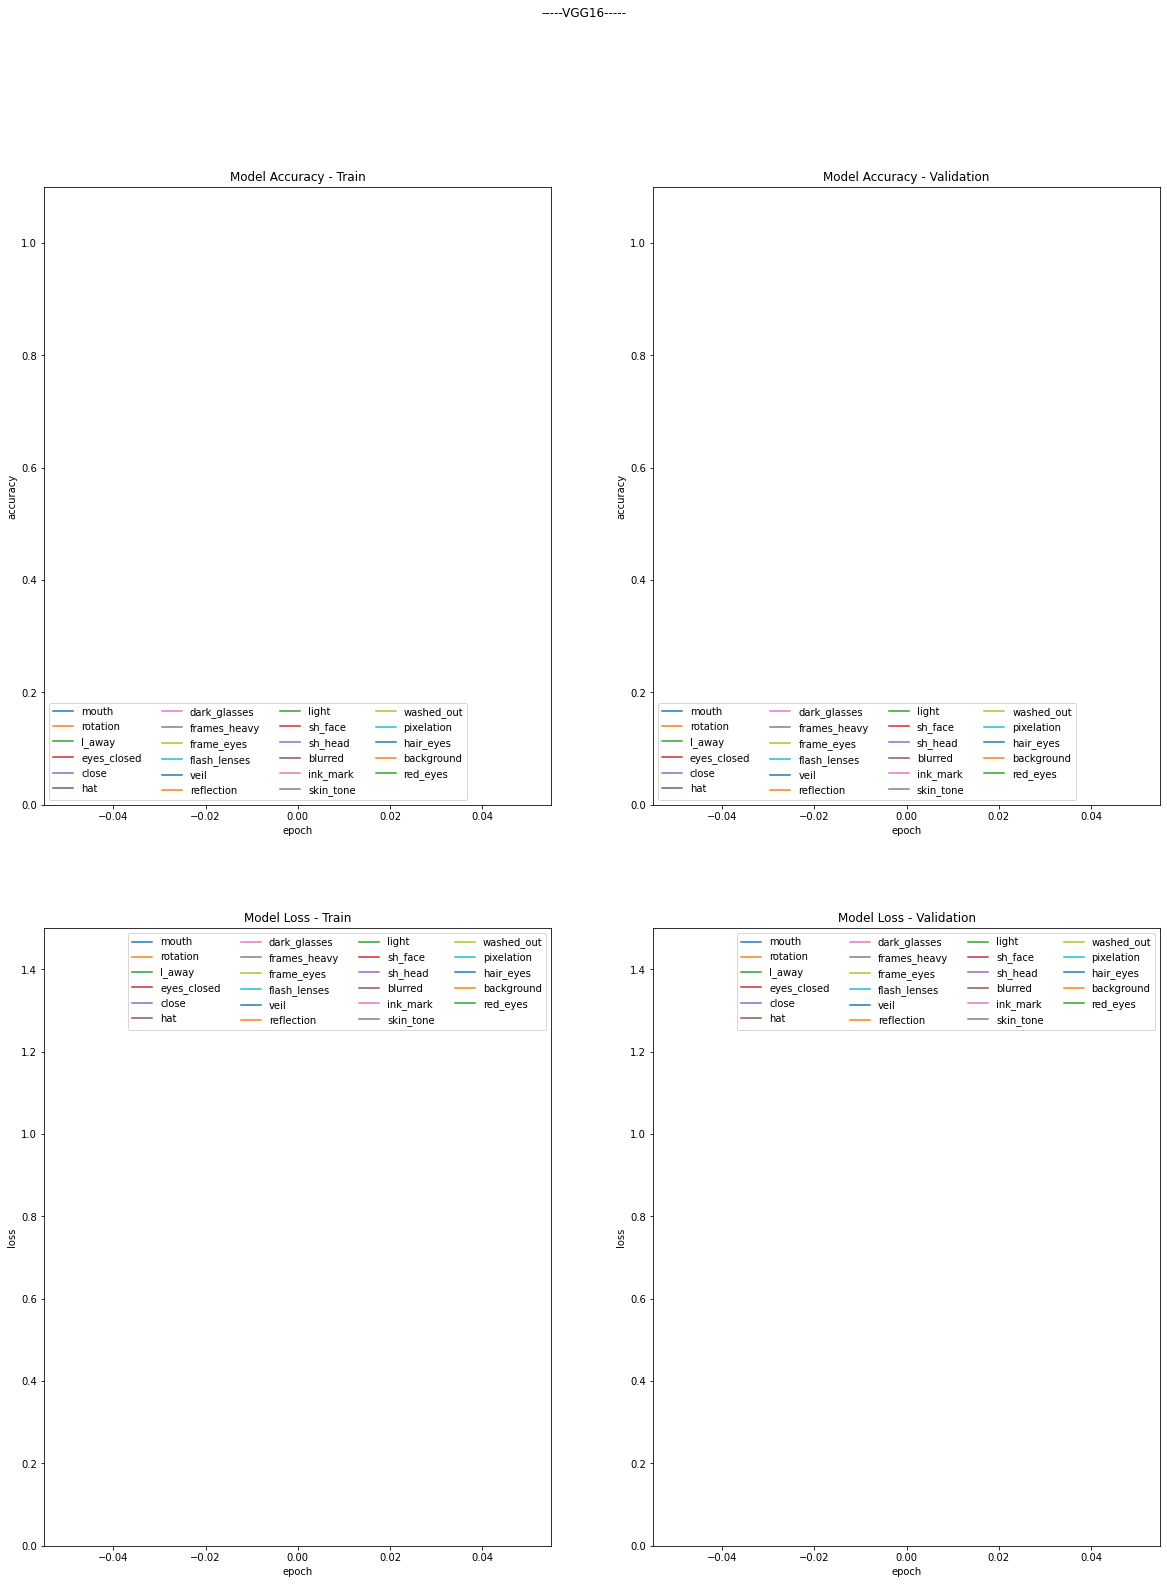

In [15]:
runner.draw_training_history()

# Load Best Model

In [16]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [20]:
runner.save_model()

-------------------- save model -------------------
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Filename: trained_model/saved_model.pb
Arcname: trained_model/saved_model.pb
Arcname: trained_model/saved_model.pb
-----
Filename: trained_model/variables/variables.index
Arcname: trained_model/variables/variables.index
Arcname: trained_model/variables/variables.index
-----
Filename: trained_model/variables/variables.data-00000-of-00001
Arcname: trained_model/variables/variables.data-00000-of-00001
Arcname: trained_model/variables/variables.data-00000-of-00001
-----
Trained model zip path: trained_model.zip
Saving process finished


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
9/9 [==============================] - 44s 4s/step
Prediction finished!
Requisite: MOUTH


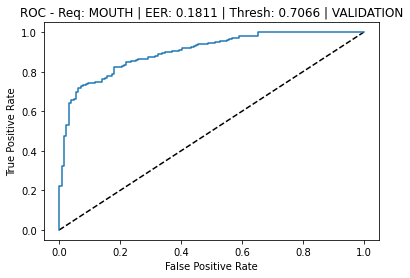

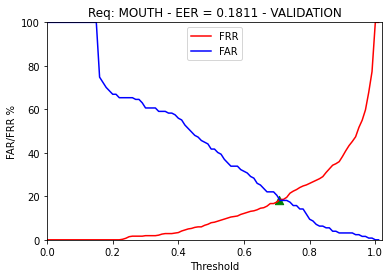

Requisite: MOUTH - EER_interp: 18.11% - Best Threshold: 0.7066391110418211
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.58      0.82      0.68       127
    COMPLIANT       0.94      0.82      0.88       420

     accuracy                           0.82       547
    macro avg       0.76      0.82      0.78       547
 weighted avg       0.86      0.82      0.83       547

Confusion matrix ----------------------------------------
FAR: 18.11% | FRR: 17.62% | EER_mean: 17.86% | TP: 346 | TN: 104 | FP: 23 | FN: 74
Accuracy ------------------------------------------------
Model Accuracy: 82.27%
---------------------------------------------------------
Requisite: ROTATION


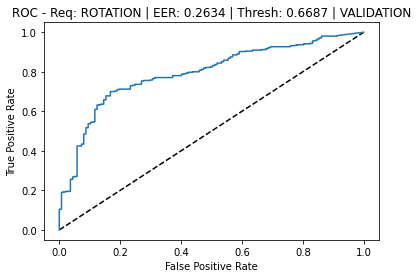

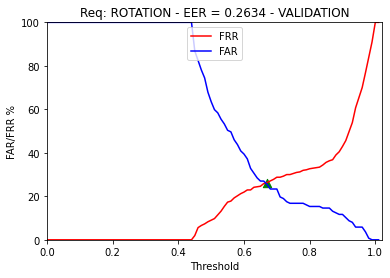

Requisite: ROTATION - EER_interp: 26.340000000000003% - Best Threshold: 0.6686504285510005
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.48      0.74      0.58       137
    COMPLIANT       0.89      0.74      0.81       410

     accuracy                           0.74       547
    macro avg       0.69      0.74      0.70       547
 weighted avg       0.79      0.74      0.75       547

Confusion matrix ----------------------------------------
FAR: 26.279999999999998% | FRR: 26.340000000000003% | EER_mean: 26.31% | TP: 302 | TN: 101 | FP: 36 | FN: 108
Accuracy ------------------------------------------------
Model Accuracy: 73.67%
---------------------------------------------------------
Requisite: L_AWAY


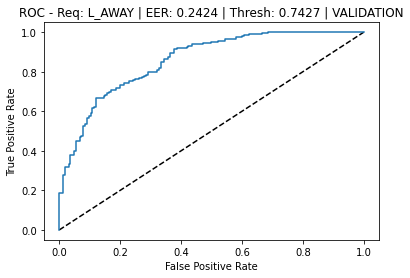

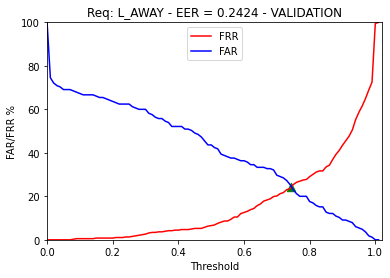

Requisite: L_AWAY - EER_interp: 24.240000000000002% - Best Threshold: 0.7426994442939746
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.58      0.76      0.65       165
    COMPLIANT       0.88      0.76      0.81       382

     accuracy                           0.76       547
    macro avg       0.73      0.76      0.73       547
 weighted avg       0.79      0.76      0.77       547

Confusion matrix ----------------------------------------
FAR: 24.240000000000002% | FRR: 24.08% | EER_mean: 24.16% | TP: 290 | TN: 125 | FP: 40 | FN: 92
Accuracy ------------------------------------------------
Model Accuracy: 75.87%
---------------------------------------------------------
Requisite: EYES_CLOSED


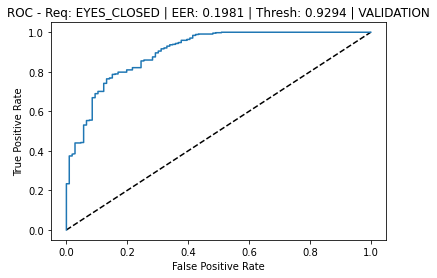

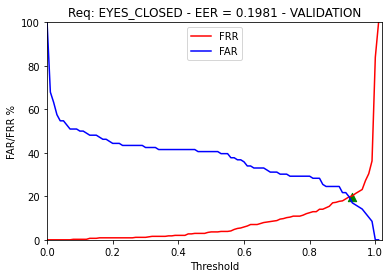

Requisite: EYES_CLOSED - EER_interp: 19.81% - Best Threshold: 0.9293895959854359
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.49      0.80      0.61       106
    COMPLIANT       0.94      0.80      0.86       441

     accuracy                           0.80       547
    macro avg       0.72      0.80      0.74       547
 weighted avg       0.86      0.80      0.81       547

Confusion matrix ----------------------------------------
FAR: 19.81% | FRR: 20.18% | EER_mean: 20.0% | TP: 352 | TN: 85 | FP: 21 | FN: 89
Accuracy ------------------------------------------------
Model Accuracy: 79.89%
---------------------------------------------------------
Requisite: CLOSE


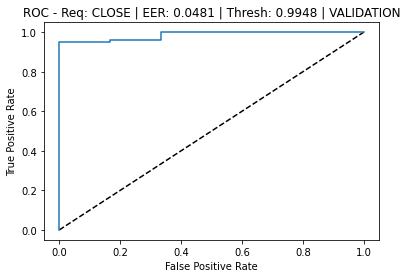

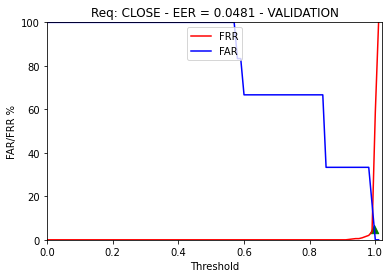

Requisite: CLOSE - EER_interp: 4.81% - Best Threshold: 0.9947875410924337
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.19      1.00      0.32         6
    COMPLIANT       1.00      0.95      0.98       541

     accuracy                           0.95       547
    macro avg       0.59      0.98      0.65       547
 weighted avg       0.99      0.95      0.97       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 4.81% | EER_mean: 2.4% | TP: 515 | TN: 6 | FP: 0 | FN: 26
Accuracy ------------------------------------------------
Model Accuracy: 95.25%
---------------------------------------------------------
Requisite: HAT


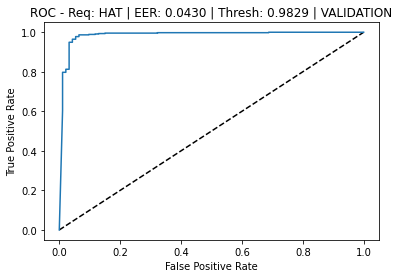

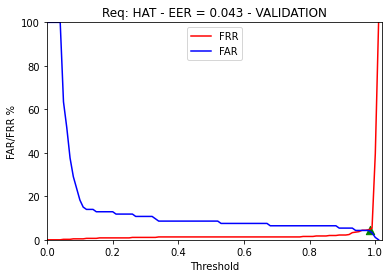

Requisite: HAT - EER_interp: 4.3% - Best Threshold: 0.982899427414063
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.79      0.96      0.87        93
    COMPLIANT       0.99      0.95      0.97       454

     accuracy                           0.95       547
    macro avg       0.89      0.95      0.92       547
 weighted avg       0.96      0.95      0.95       547

Confusion matrix ----------------------------------------
FAR: 4.3% | FRR: 5.07% | EER_mean: 4.68% | TP: 431 | TN: 89 | FP: 4 | FN: 23
Accuracy ------------------------------------------------
Model Accuracy: 95.06%
---------------------------------------------------------
Requisite: DARK_GLASSES


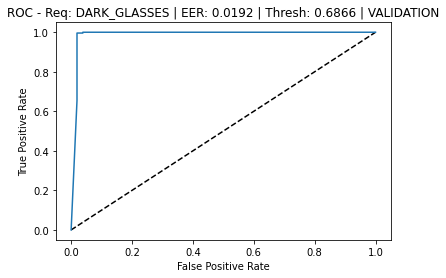

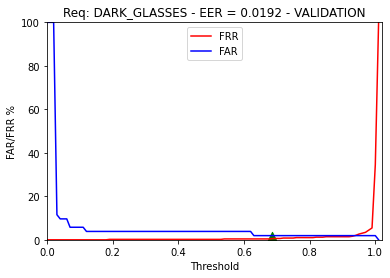

Requisite: DARK_GLASSES - EER_interp: 1.92% - Best Threshold: 0.686577975747415
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.96      0.98      0.97        52
    COMPLIANT       1.00      1.00      1.00       495

     accuracy                           0.99       547
    macro avg       0.98      0.99      0.98       547
 weighted avg       0.99      0.99      0.99       547

Confusion matrix ----------------------------------------
FAR: 1.92% | FRR: 0.4% | EER_mean: 1.16% | TP: 493 | TN: 51 | FP: 1 | FN: 2
Accuracy ------------------------------------------------
Model Accuracy: 99.45%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


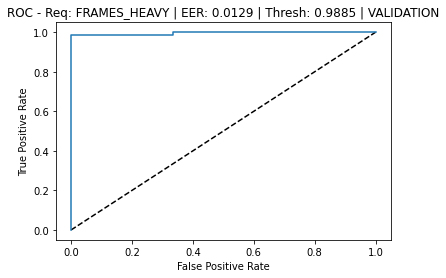

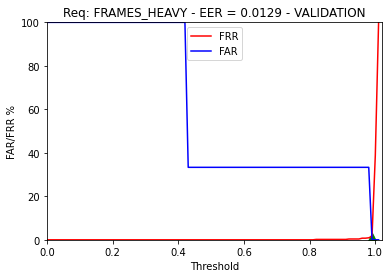

Requisite: FRAMES_HEAVY - EER_interp: 1.29% - Best Threshold: 0.9884786085389996
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.30      1.00      0.46         3
    COMPLIANT       1.00      0.99      0.99       544

     accuracy                           0.99       547
    macro avg       0.65      0.99      0.73       547
 weighted avg       1.00      0.99      0.99       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 1.29% | EER_mean: 0.64% | TP: 537 | TN: 3 | FP: 0 | FN: 7
Accuracy ------------------------------------------------
Model Accuracy: 98.72%
---------------------------------------------------------
Requisite: FRAME_EYES


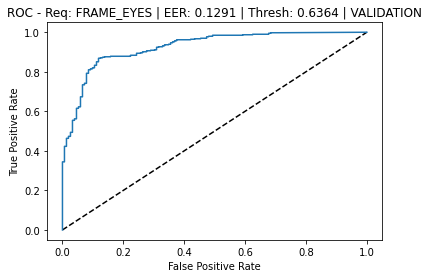

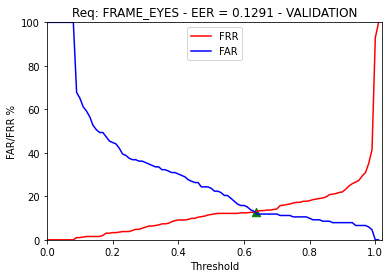

Requisite: FRAME_EYES - EER_interp: 12.91% - Best Threshold: 0.6363791209232958
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.72      0.88      0.79       152
    COMPLIANT       0.95      0.87      0.91       395

     accuracy                           0.87       547
    macro avg       0.84      0.87      0.85       547
 weighted avg       0.89      0.87      0.88       547

Confusion matrix ----------------------------------------
FAR: 12.5% | FRR: 12.91% | EER_mean: 12.7% | TP: 344 | TN: 133 | FP: 19 | FN: 51
Accuracy ------------------------------------------------
Model Accuracy: 87.2%
---------------------------------------------------------
Requisite: FLASH_LENSES


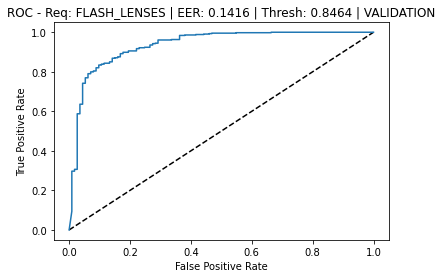

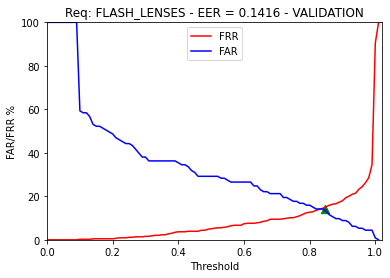

Requisite: FLASH_LENSES - EER_interp: 14.16% - Best Threshold: 0.8463518023490907
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.60      0.86      0.71       113
    COMPLIANT       0.96      0.85      0.90       434

     accuracy                           0.85       547
    macro avg       0.78      0.85      0.80       547
 weighted avg       0.88      0.85      0.86       547

Confusion matrix ----------------------------------------
FAR: 14.16% | FRR: 14.979999999999999% | EER_mean: 14.57% | TP: 369 | TN: 97 | FP: 16 | FN: 65
Accuracy ------------------------------------------------
Model Accuracy: 85.19%
---------------------------------------------------------
Requisite: VEIL


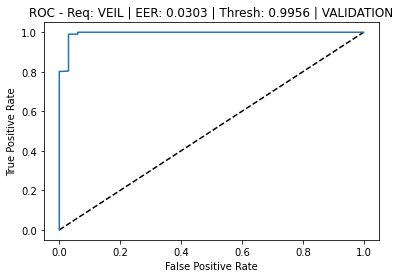

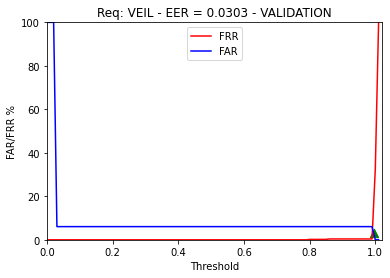

Requisite: VEIL - EER_interp: 3.0300000000000002% - Best Threshold: 0.9955581426620462
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.86      0.97      0.91        33
    COMPLIANT       1.00      0.99      0.99       514

     accuracy                           0.99       547
    macro avg       0.93      0.98      0.95       547
 weighted avg       0.99      0.99      0.99       547

Confusion matrix ----------------------------------------
FAR: 3.0300000000000002% | FRR: 0.97% | EER_mean: 2.0% | TP: 509 | TN: 32 | FP: 1 | FN: 5
Accuracy ------------------------------------------------
Model Accuracy: 98.9%
---------------------------------------------------------
Requisite: REFLECTION


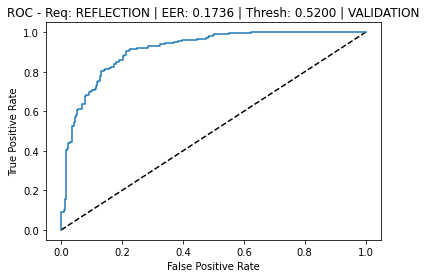

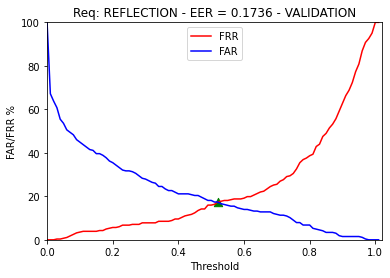

Requisite: REFLECTION - EER_interp: 17.36% - Best Threshold: 0.5200363397600106
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.82      0.83      0.82       265
    COMPLIANT       0.84      0.83      0.83       282

     accuracy                           0.83       547
    macro avg       0.83      0.83      0.83       547
 weighted avg       0.83      0.83      0.83       547

Confusion matrix ----------------------------------------
FAR: 17.36% | FRR: 17.380000000000003% | EER_mean: 17.37% | TP: 233 | TN: 219 | FP: 46 | FN: 49
Accuracy ------------------------------------------------
Model Accuracy: 82.63000000000001%
---------------------------------------------------------
Requisite: LIGHT


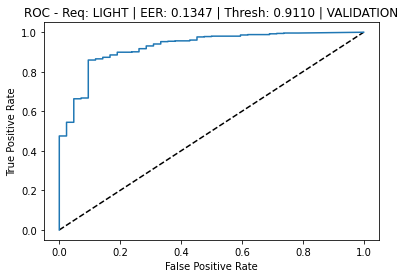

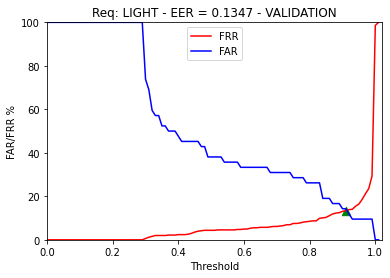

Requisite: LIGHT - EER_interp: 13.469999999999999% - Best Threshold: 0.9110263311036743
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.35      0.88      0.50        42
    COMPLIANT       0.99      0.87      0.92       505

     accuracy                           0.87       547
    macro avg       0.67      0.87      0.71       547
 weighted avg       0.94      0.87      0.89       547

Confusion matrix ----------------------------------------
FAR: 11.899999999999999% | FRR: 13.469999999999999% | EER_mean: 12.68% | TP: 437 | TN: 37 | FP: 5 | FN: 68
Accuracy ------------------------------------------------
Model Accuracy: 86.65%
---------------------------------------------------------
Requisite: SH_FACE


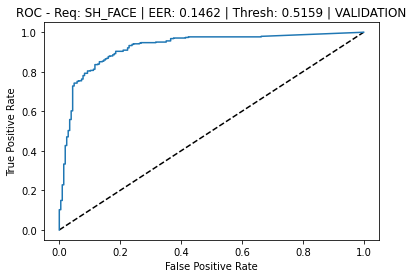

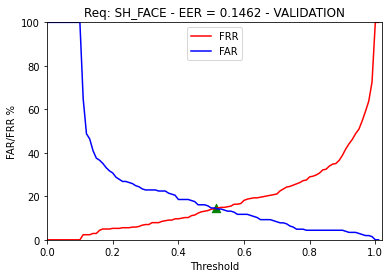

Requisite: SH_FACE - EER_interp: 14.62% - Best Threshold: 0.5158506488939648
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.78      0.86      0.82       205
    COMPLIANT       0.91      0.85      0.88       342

     accuracy                           0.86       547
    macro avg       0.84      0.86      0.85       547
 weighted avg       0.86      0.86      0.86       547

Confusion matrix ----------------------------------------
FAR: 14.149999999999999% | FRR: 14.62% | EER_mean: 14.38% | TP: 292 | TN: 176 | FP: 29 | FN: 50
Accuracy ------------------------------------------------
Model Accuracy: 85.56%
---------------------------------------------------------
Requisite: SH_HEAD


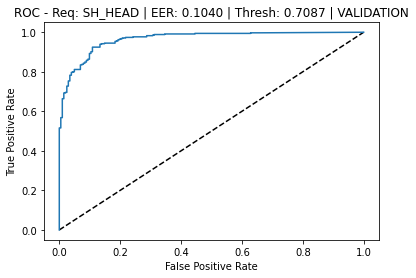

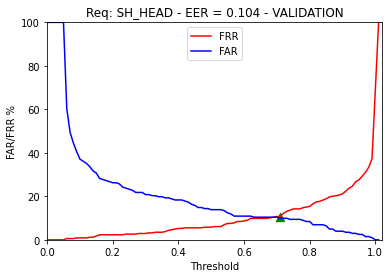

Requisite: SH_HEAD - EER_interp: 10.4% - Best Threshold: 0.7087222337727395
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.83      0.90      0.86       202
    COMPLIANT       0.94      0.89      0.91       345

     accuracy                           0.89       547
    macro avg       0.88      0.89      0.89       547
 weighted avg       0.90      0.89      0.89       547

Confusion matrix ----------------------------------------
FAR: 10.4% | FRR: 10.72% | EER_mean: 10.56% | TP: 308 | TN: 181 | FP: 21 | FN: 37
Accuracy ------------------------------------------------
Model Accuracy: 89.4%
---------------------------------------------------------
Requisite: BLURRED


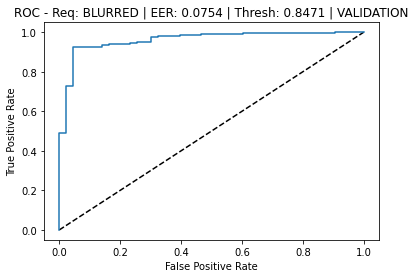

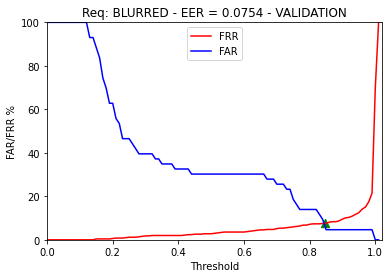

Requisite: BLURRED - EER_interp: 7.539999999999999% - Best Threshold: 0.8470853942411918
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.51      0.93      0.66        43
    COMPLIANT       0.99      0.92      0.96       504

     accuracy                           0.93       547
    macro avg       0.75      0.93      0.81       547
 weighted avg       0.96      0.93      0.93       547

Confusion matrix ----------------------------------------
FAR: 6.98% | FRR: 7.539999999999999% | EER_mean: 7.26% | TP: 466 | TN: 40 | FP: 3 | FN: 38
Accuracy ------------------------------------------------
Model Accuracy: 92.5%
---------------------------------------------------------
Requisite: SKIN_TONE


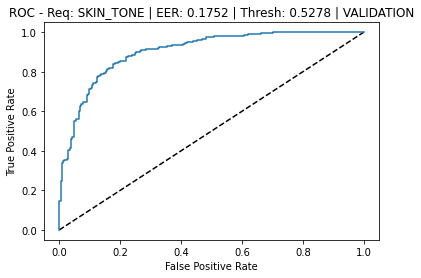

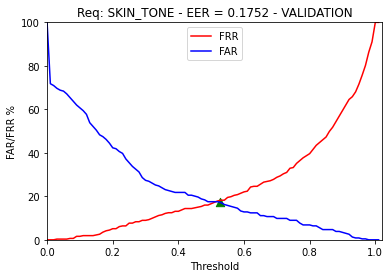

Requisite: SKIN_TONE - EER_interp: 17.52% - Best Threshold: 0.5278391838086022
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.77      0.82      0.80       234
    COMPLIANT       0.86      0.82      0.84       313

     accuracy                           0.82       547
    macro avg       0.82      0.82      0.82       547
 weighted avg       0.82      0.82      0.82       547

Confusion matrix ----------------------------------------
FAR: 17.52% | FRR: 18.21% | EER_mean: 17.86% | TP: 256 | TN: 193 | FP: 41 | FN: 57
Accuracy ------------------------------------------------
Model Accuracy: 82.08%
---------------------------------------------------------
Requisite: WASHED_OUT


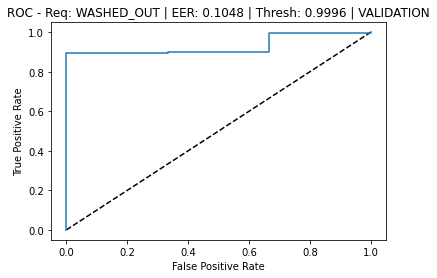

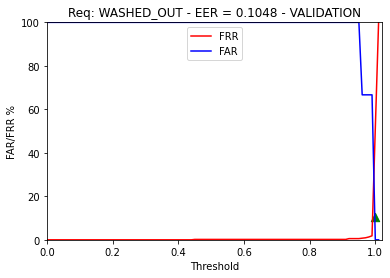

Requisite: WASHED_OUT - EER_interp: 10.48% - Best Threshold: 0.9995829905657208
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.05      1.00      0.10         3
    COMPLIANT       1.00      0.90      0.94       544

     accuracy                           0.90       547
    macro avg       0.53      0.95      0.52       547
 weighted avg       0.99      0.90      0.94       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 10.48% | EER_mean: 5.24% | TP: 487 | TN: 3 | FP: 0 | FN: 57
Accuracy ------------------------------------------------
Model Accuracy: 89.58%
---------------------------------------------------------
Requisite: PIXELATION


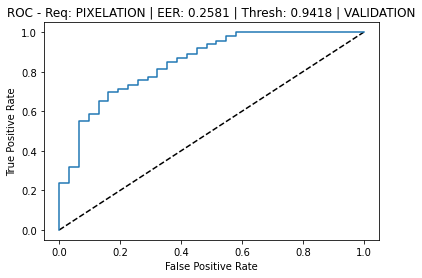

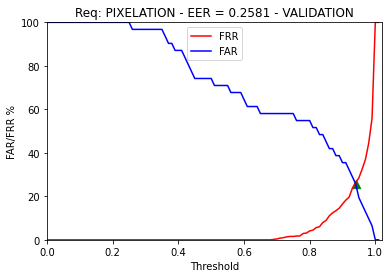

Requisite: PIXELATION - EER_interp: 25.81% - Best Threshold: 0.941750645637519
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.14      0.74      0.24        31
    COMPLIANT       0.98      0.73      0.84       516

     accuracy                           0.73       547
    macro avg       0.56      0.74      0.54       547
 weighted avg       0.93      0.73      0.80       547

Confusion matrix ----------------------------------------
FAR: 25.81% | FRR: 26.939999999999998% | EER_mean: 26.38% | TP: 377 | TN: 23 | FP: 8 | FN: 139
Accuracy ------------------------------------------------
Model Accuracy: 73.13%
---------------------------------------------------------
Requisite: HAIR_EYES


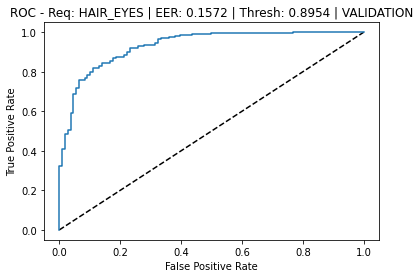

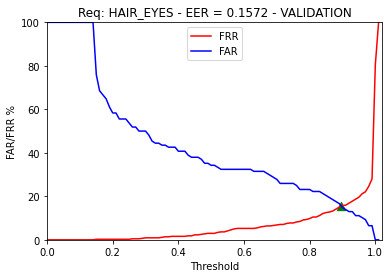

Requisite: HAIR_EYES - EER_interp: 15.72% - Best Threshold: 0.8953552819058677
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.57      0.85      0.68       108
    COMPLIANT       0.96      0.84      0.90       439

     accuracy                           0.84       547
    macro avg       0.76      0.85      0.79       547
 weighted avg       0.88      0.84      0.85       547

Confusion matrix ----------------------------------------
FAR: 14.81% | FRR: 15.72% | EER_mean: 15.260000000000002% | TP: 370 | TN: 92 | FP: 16 | FN: 69
Accuracy ------------------------------------------------
Model Accuracy: 84.46000000000001%
---------------------------------------------------------
Requisite: BACKGROUND


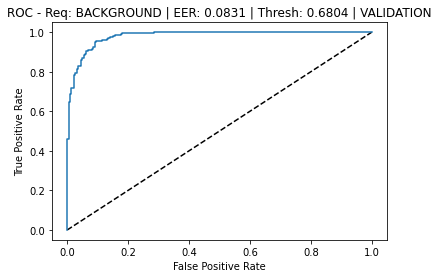

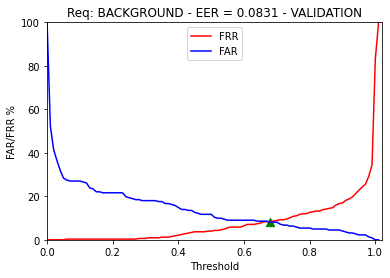

Requisite: BACKGROUND - EER_interp: 8.309999999999999% - Best Threshold: 0.6804288315772188
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.88      0.92      0.90       222
    COMPLIANT       0.94      0.92      0.93       325

     accuracy                           0.92       547
    macro avg       0.91      0.92      0.92       547
 weighted avg       0.92      0.92      0.92       547

Confusion matrix ----------------------------------------
FAR: 8.110000000000001% | FRR: 8.309999999999999% | EER_mean: 8.21% | TP: 298 | TN: 204 | FP: 18 | FN: 27
Accuracy ------------------------------------------------
Model Accuracy: 91.77%
---------------------------------------------------------
Requisite: RED_EYES


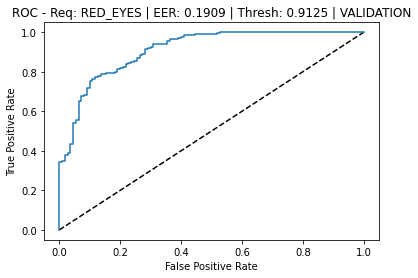

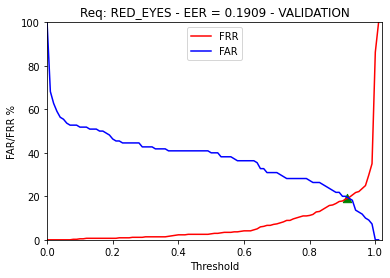

Requisite: RED_EYES - EER_interp: 19.09% - Best Threshold: 0.9124754667282021
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.52      0.81      0.63       110
    COMPLIANT       0.94      0.81      0.87       437

     accuracy                           0.81       547
    macro avg       0.73      0.81      0.75       547
 weighted avg       0.86      0.81      0.83       547

Confusion matrix ----------------------------------------
FAR: 19.09% | FRR: 18.759999999999998% | EER_mean: 18.92% | TP: 355 | TN: 89 | FP: 21 | FN: 82
Accuracy ------------------------------------------------
Model Accuracy: 81.17%
---------------------------------------------------------


In [16]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
5/5 [==============================] - 22s 5s/step
Prediction finished!
Requisite: MOUTH


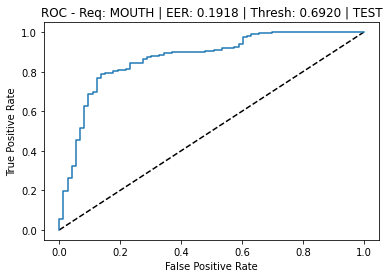

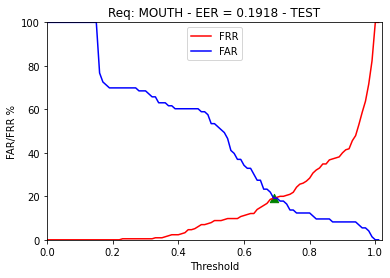

Requisite: MOUTH - EER_interp: 19.18% - Best Threshold: 0.6920032501216963
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.59      0.81      0.68        73
    COMPLIANT       0.93      0.81      0.86       215

     accuracy                           0.81       288
    macro avg       0.76      0.81      0.77       288
 weighted avg       0.84      0.81      0.82       288

Confusion matrix ----------------------------------------
FAR: 19.18% | FRR: 19.07% | EER_mean: 19.12% | TP: 174 | TN: 59 | FP: 14 | FN: 41
Accuracy ------------------------------------------------
Model Accuracy: 80.9%
---------------------------------------------------------
Requisite: ROTATION


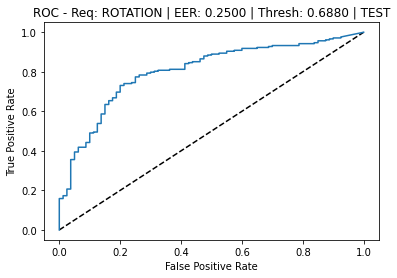

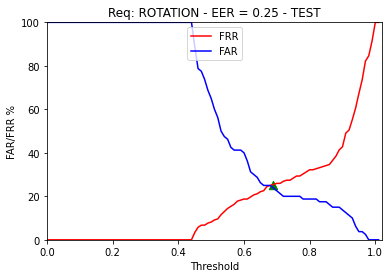

Requisite: ROTATION - EER_interp: 25.0% - Best Threshold: 0.6879906058315693
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.53      0.75      0.62        80
    COMPLIANT       0.89      0.75      0.81       208

     accuracy                           0.75       288
    macro avg       0.71      0.75      0.72       288
 weighted avg       0.79      0.75      0.76       288

Confusion matrix ----------------------------------------
FAR: 25.0% | FRR: 25.480000000000004% | EER_mean: 25.240000000000002% | TP: 155 | TN: 60 | FP: 20 | FN: 53
Accuracy ------------------------------------------------
Model Accuracy: 74.65%
---------------------------------------------------------
Requisite: L_AWAY


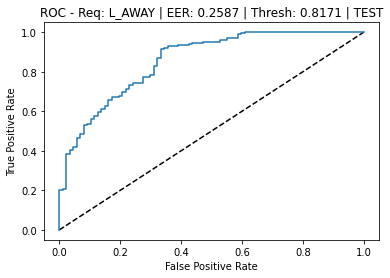

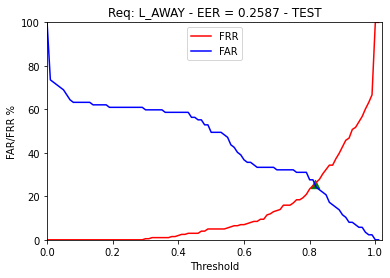

Requisite: L_AWAY - EER_interp: 25.869999999999997% - Best Threshold: 0.8171230717677975
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.56      0.75      0.64        87
    COMPLIANT       0.87      0.74      0.80       201

     accuracy                           0.74       288
    macro avg       0.71      0.74      0.72       288
 weighted avg       0.78      0.74      0.75       288

Confusion matrix ----------------------------------------
FAR: 25.290000000000003% | FRR: 25.869999999999997% | EER_mean: 25.580000000000002% | TP: 149 | TN: 65 | FP: 22 | FN: 52
Accuracy ------------------------------------------------
Model Accuracy: 74.31%
---------------------------------------------------------
Requisite: EYES_CLOSED


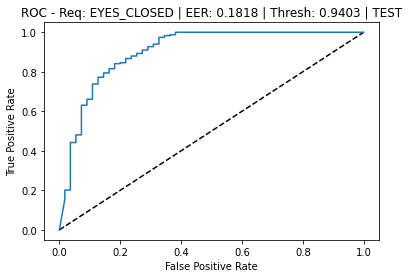

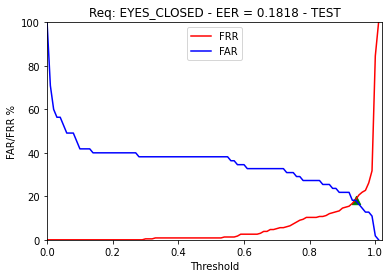

Requisite: EYES_CLOSED - EER_interp: 18.18% - Best Threshold: 0.9403226375580063
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.51      0.82      0.63        55
    COMPLIANT       0.95      0.82      0.88       233

     accuracy                           0.82       288
    macro avg       0.73      0.82      0.75       288
 weighted avg       0.87      0.82      0.83       288

Confusion matrix ----------------------------------------
FAR: 18.18% | FRR: 18.45% | EER_mean: 18.310000000000002% | TP: 190 | TN: 45 | FP: 10 | FN: 43
Accuracy ------------------------------------------------
Model Accuracy: 81.6%
---------------------------------------------------------
Requisite: CLOSE


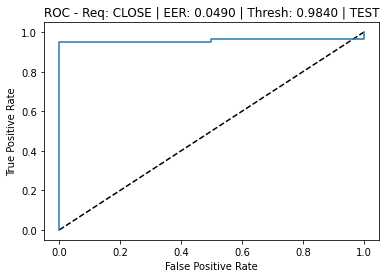

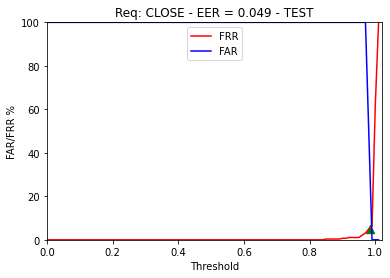

Requisite: CLOSE - EER_interp: 4.9% - Best Threshold: 0.9840189672850229
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.12      1.00      0.22         2
    COMPLIANT       1.00      0.95      0.97       286

     accuracy                           0.95       288
    macro avg       0.56      0.98      0.60       288
 weighted avg       0.99      0.95      0.97       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 4.9% | EER_mean: 2.45% | TP: 272 | TN: 2 | FP: 0 | FN: 14
Accuracy ------------------------------------------------
Model Accuracy: 95.14%
---------------------------------------------------------
Requisite: HAT


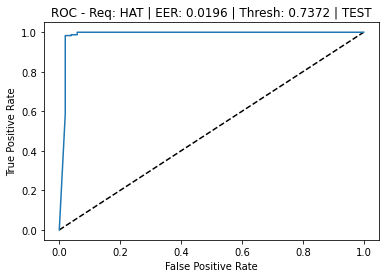

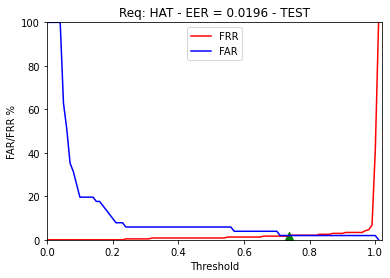

Requisite: HAT - EER_interp: 1.96% - Best Threshold: 0.7372146248789638
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.93      0.98      0.95        51
    COMPLIANT       1.00      0.98      0.99       237

     accuracy                           0.98       288
    macro avg       0.96      0.98      0.97       288
 weighted avg       0.98      0.98      0.98       288

Confusion matrix ----------------------------------------
FAR: 1.96% | FRR: 1.69% | EER_mean: 1.82% | TP: 233 | TN: 50 | FP: 1 | FN: 4
Accuracy ------------------------------------------------
Model Accuracy: 98.26%
---------------------------------------------------------
Requisite: DARK_GLASSES


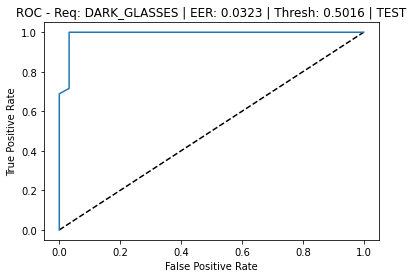

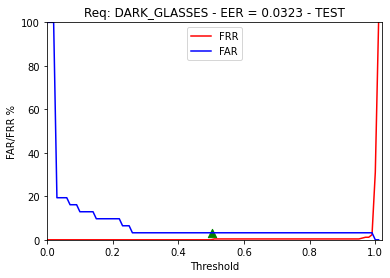

Requisite: DARK_GLASSES - EER_interp: 3.2300000000000004% - Best Threshold: 0.5016295909873648
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.97      0.98        31
    COMPLIANT       1.00      1.00      1.00       257

     accuracy                           1.00       288
    macro avg       1.00      0.98      0.99       288
 weighted avg       1.00      1.00      1.00       288

Confusion matrix ----------------------------------------
FAR: 3.2300000000000004% | FRR: 0.0% | EER_mean: 1.6199999999999999% | TP: 257 | TN: 30 | FP: 1 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.65%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:626: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


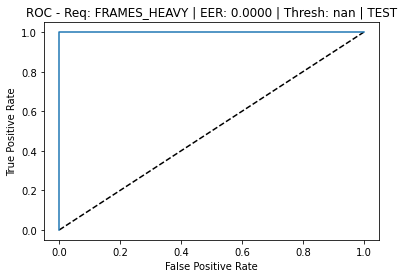

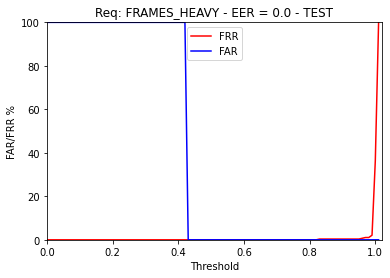

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Requisite: FRAMES_HEAVY - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         2
    COMPLIANT       0.99      1.00      1.00       286

     accuracy                           0.99       288
    macro avg       0.50      0.50      0.50       288
 weighted avg       0.99      0.99      0.99       288

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 286 | TN: 0 | FP: 2 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.31%
---------------------------------------------------------
Requisite: FRAME_EYES


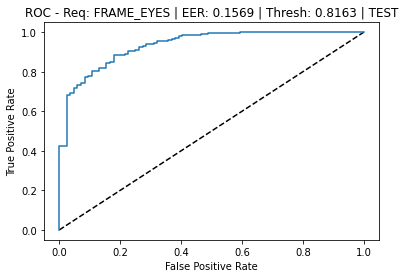

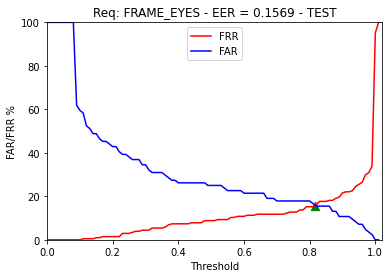

Requisite: FRAME_EYES - EER_interp: 15.690000000000001% - Best Threshold: 0.8162766765145695
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.69      0.85      0.76        84
    COMPLIANT       0.93      0.84      0.88       204

     accuracy                           0.84       288
    macro avg       0.81      0.84      0.82       288
 weighted avg       0.86      0.84      0.85       288

Confusion matrix ----------------------------------------
FAR: 15.479999999999999% | FRR: 15.690000000000001% | EER_mean: 15.58% | TP: 172 | TN: 71 | FP: 13 | FN: 32
Accuracy ------------------------------------------------
Model Accuracy: 84.38%
---------------------------------------------------------
Requisite: FLASH_LENSES


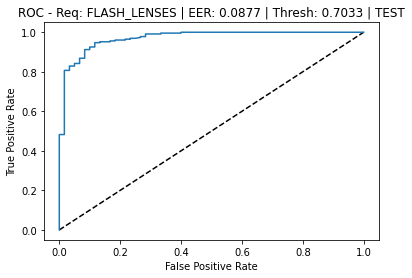

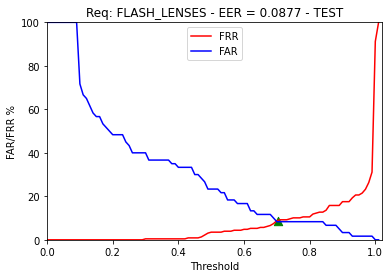

Requisite: FLASH_LENSES - EER_interp: 8.77% - Best Threshold: 0.7032636968714047
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.73      0.92      0.81        60
    COMPLIANT       0.98      0.91      0.94       228

     accuracy                           0.91       288
    macro avg       0.85      0.91      0.88       288
 weighted avg       0.93      0.91      0.92       288

Confusion matrix ----------------------------------------
FAR: 8.33% | FRR: 8.77% | EER_mean: 8.55% | TP: 208 | TN: 55 | FP: 5 | FN: 20
Accuracy ------------------------------------------------
Model Accuracy: 91.32000000000001%
---------------------------------------------------------
Requisite: VEIL


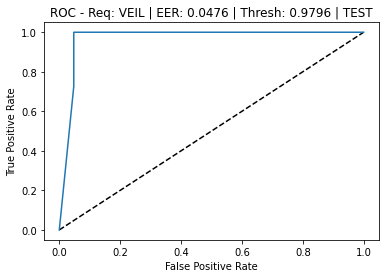

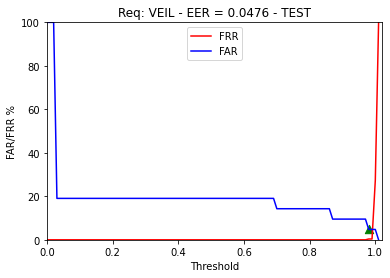

Requisite: VEIL - EER_interp: 4.760000000000001% - Best Threshold: 0.9795533418652776
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.95      0.98        21
    COMPLIANT       1.00      1.00      1.00       267

     accuracy                           1.00       288
    macro avg       1.00      0.98      0.99       288
 weighted avg       1.00      1.00      1.00       288

Confusion matrix ----------------------------------------
FAR: 4.760000000000001% | FRR: 0.0% | EER_mean: 2.3800000000000003% | TP: 267 | TN: 20 | FP: 1 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.65%
---------------------------------------------------------
Requisite: REFLECTION


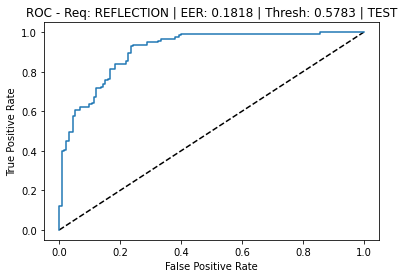

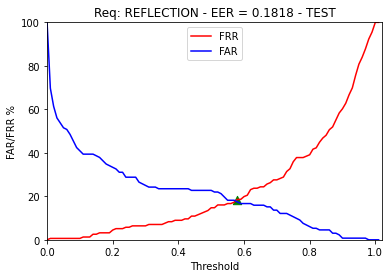

Requisite: REFLECTION - EER_interp: 18.18% - Best Threshold: 0.5783162713055513
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.79      0.82      0.80       132
    COMPLIANT       0.84      0.81      0.83       156

     accuracy                           0.82       288
    macro avg       0.81      0.82      0.82       288
 weighted avg       0.82      0.82      0.82       288

Confusion matrix ----------------------------------------
FAR: 18.18% | FRR: 18.59% | EER_mean: 18.39% | TP: 127 | TN: 108 | FP: 24 | FN: 29
Accuracy ------------------------------------------------
Model Accuracy: 81.6%
---------------------------------------------------------
Requisite: LIGHT


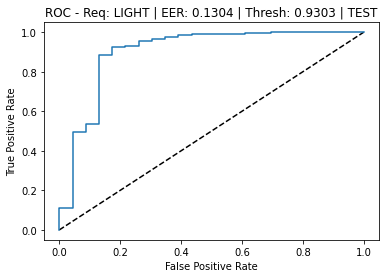

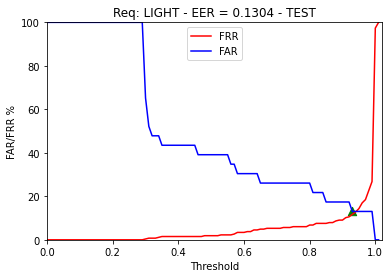

Requisite: LIGHT - EER_interp: 13.04% - Best Threshold: 0.9303334951400674
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.39      0.87      0.54        23
    COMPLIANT       0.99      0.88      0.93       265

     accuracy                           0.88       288
    macro avg       0.69      0.88      0.74       288
 weighted avg       0.94      0.88      0.90       288

Confusion matrix ----------------------------------------
FAR: 13.04% | FRR: 11.700000000000001% | EER_mean: 12.370000000000001% | TP: 234 | TN: 20 | FP: 3 | FN: 31
Accuracy ------------------------------------------------
Model Accuracy: 88.19%
---------------------------------------------------------
Requisite: SH_FACE


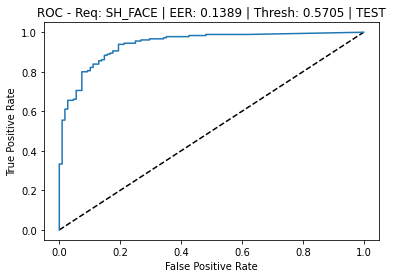

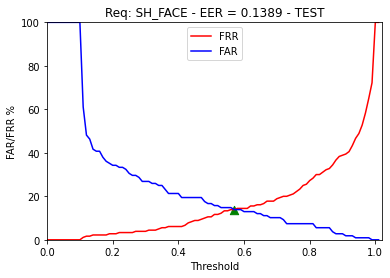

Requisite: SH_FACE - EER_interp: 13.889999999999999% - Best Threshold: 0.5704720616333043
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.79      0.86      0.82       108
    COMPLIANT       0.91      0.86      0.89       180

     accuracy                           0.86       288
    macro avg       0.85      0.86      0.85       288
 weighted avg       0.87      0.86      0.86       288

Confusion matrix ----------------------------------------
FAR: 13.889999999999999% | FRR: 13.889999999999999% | EER_mean: 13.889999999999999% | TP: 155 | TN: 93 | FP: 15 | FN: 25
Accuracy ------------------------------------------------
Model Accuracy: 86.11%
---------------------------------------------------------
Requisite: SH_HEAD


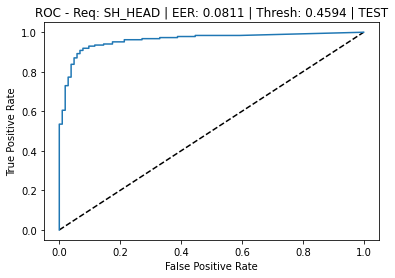

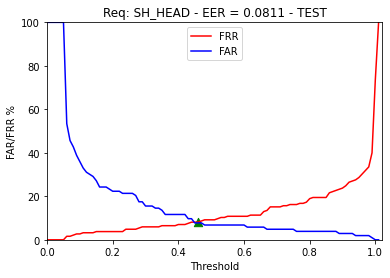

Requisite: SH_HEAD - EER_interp: 8.110000000000001% - Best Threshold: 0.45940405573393855
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.86      0.92      0.89       103
    COMPLIANT       0.96      0.92      0.94       185

     accuracy                           0.92       288
    macro avg       0.91      0.92      0.91       288
 weighted avg       0.92      0.92      0.92       288

Confusion matrix ----------------------------------------
FAR: 7.7700000000000005% | FRR: 8.110000000000001% | EER_mean: 7.9399999999999995% | TP: 170 | TN: 95 | FP: 8 | FN: 15
Accuracy ------------------------------------------------
Model Accuracy: 92.01%
---------------------------------------------------------
Requisite: BLURRED


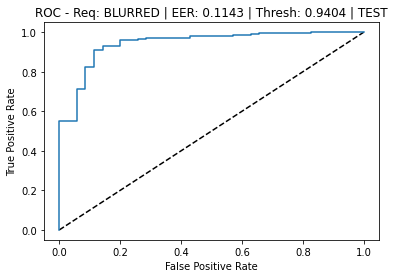

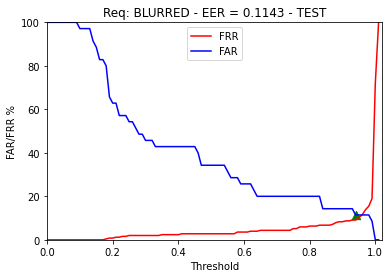

Requisite: BLURRED - EER_interp: 11.43% - Best Threshold: 0.9404281973838706
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.57      0.89      0.70        35
    COMPLIANT       0.98      0.91      0.94       253

     accuracy                           0.91       288
    macro avg       0.78      0.90      0.82       288
 weighted avg       0.93      0.91      0.91       288

Confusion matrix ----------------------------------------
FAR: 11.43% | FRR: 9.09% | EER_mean: 10.26% | TP: 230 | TN: 31 | FP: 4 | FN: 23
Accuracy ------------------------------------------------
Model Accuracy: 90.62%
---------------------------------------------------------
Requisite: SKIN_TONE


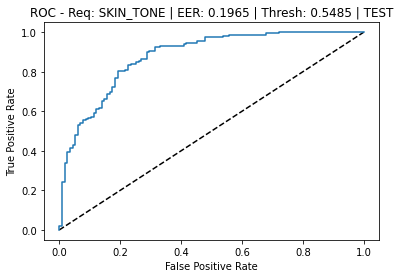

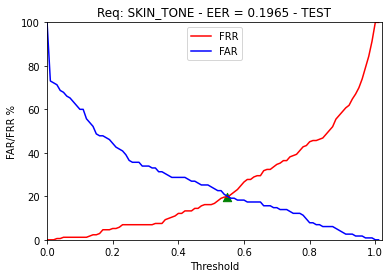

Requisite: SKIN_TONE - EER_interp: 19.650000000000002% - Best Threshold: 0.5484643439566682
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.73      0.80      0.76       115
    COMPLIANT       0.86      0.80      0.83       173

     accuracy                           0.80       288
    macro avg       0.79      0.80      0.80       288
 weighted avg       0.81      0.80      0.80       288

Confusion matrix ----------------------------------------
FAR: 20.0% | FRR: 19.650000000000002% | EER_mean: 19.82% | TP: 139 | TN: 92 | FP: 23 | FN: 34
Accuracy ------------------------------------------------
Model Accuracy: 80.21000000000001%
---------------------------------------------------------
Requisite: WASHED_OUT


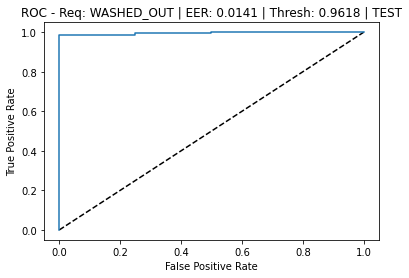

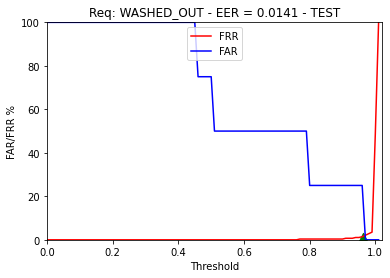

Requisite: WASHED_OUT - EER_interp: 1.41% - Best Threshold: 0.9618014827580526
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.50      1.00      0.67         4
    COMPLIANT       1.00      0.99      0.99       284

     accuracy                           0.99       288
    macro avg       0.75      0.99      0.83       288
 weighted avg       0.99      0.99      0.99       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 1.41% | EER_mean: 0.7000000000000001% | TP: 280 | TN: 4 | FP: 0 | FN: 4
Accuracy ------------------------------------------------
Model Accuracy: 98.61%
---------------------------------------------------------
Requisite: PIXELATION


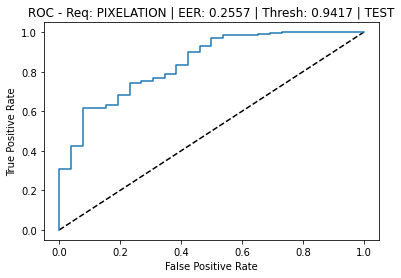

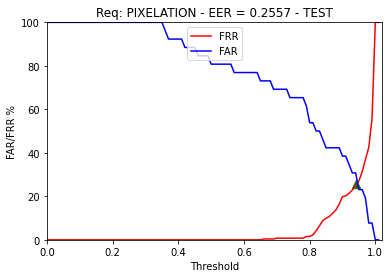

Requisite: PIXELATION - EER_interp: 25.569999999999997% - Best Threshold: 0.9416798780892643
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.23      0.77      0.35        26
    COMPLIANT       0.97      0.74      0.84       262

     accuracy                           0.75       288
    macro avg       0.60      0.76      0.60       288
 weighted avg       0.90      0.75      0.80       288

Confusion matrix ----------------------------------------
FAR: 23.080000000000002% | FRR: 25.569999999999997% | EER_mean: 24.32% | TP: 195 | TN: 20 | FP: 6 | FN: 67
Accuracy ------------------------------------------------
Model Accuracy: 74.65%
---------------------------------------------------------
Requisite: HAIR_EYES


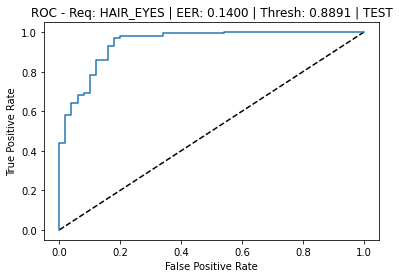

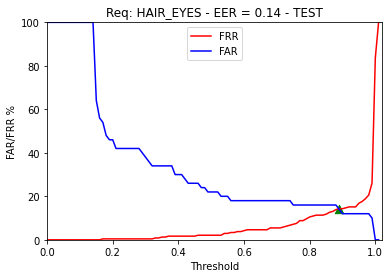

Requisite: HAIR_EYES - EER_interp: 14.000000000000002% - Best Threshold: 0.8891407251355075
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.57      0.86      0.68        50
    COMPLIANT       0.97      0.86      0.91       238

     accuracy                           0.86       288
    macro avg       0.77      0.86      0.80       288
 weighted avg       0.90      0.86      0.87       288

Confusion matrix ----------------------------------------
FAR: 14.000000000000002% | FRR: 13.87% | EER_mean: 13.94% | TP: 205 | TN: 43 | FP: 7 | FN: 33
Accuracy ------------------------------------------------
Model Accuracy: 86.11%
---------------------------------------------------------
Requisite: BACKGROUND


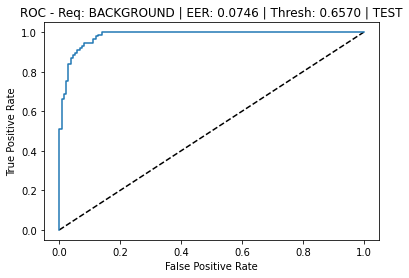

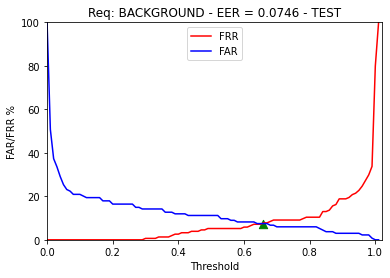

Requisite: BACKGROUND - EER_interp: 7.46% - Best Threshold: 0.6570237278911787
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.92      0.93      0.92       134
    COMPLIANT       0.93      0.93      0.93       154

     accuracy                           0.93       288
    macro avg       0.93      0.93      0.93       288
 weighted avg       0.93      0.93      0.93       288

Confusion matrix ----------------------------------------
FAR: 7.46% | FRR: 7.140000000000001% | EER_mean: 7.3% | TP: 143 | TN: 124 | FP: 10 | FN: 11
Accuracy ------------------------------------------------
Model Accuracy: 92.71000000000001%
---------------------------------------------------------
Requisite: RED_EYES


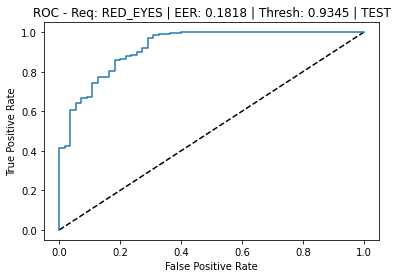

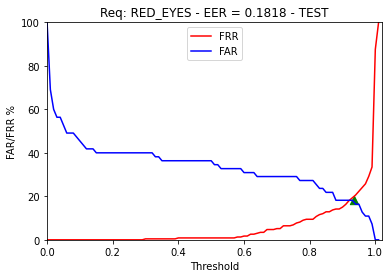

Requisite: RED_EYES - EER_interp: 18.18% - Best Threshold: 0.9344592690468867
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.49      0.82      0.62        55
    COMPLIANT       0.95      0.80      0.87       233

     accuracy                           0.81       288
    macro avg       0.72      0.81      0.74       288
 weighted avg       0.86      0.81      0.82       288

Confusion matrix ----------------------------------------
FAR: 18.18% | FRR: 19.74% | EER_mean: 18.96% | TP: 187 | TN: 45 | FP: 10 | FN: 46
Accuracy ------------------------------------------------
Model Accuracy: 80.56%
---------------------------------------------------------


In [17]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Vizualize Model Classification

# Finishing Experiment Manager

In [18]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Not using Neptune
